In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
games = pd.read_csv('../Data/vgsales_new.csv')
games.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,NA_Total,EU_Sales,EU_Total,JP_Sales,JP_Total,Other_Sales,Other_Total,Global_Sales,Global_Total,Mods
0,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,4000000,0.26,260000,0.0,0,0.05,50000,4.31,4310000,"1,000,000"
1,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,2560000,0.17,170000,0.0,0,0.03,30000,2.76,2760000,NaN


In [3]:
games = games.drop(columns= 'Mods')

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   NA_Total      16598 non-null  int64  
 8   EU_Sales      16598 non-null  float64
 9   EU_Total      16598 non-null  int64  
 10  JP_Sales      16598 non-null  float64
 11  JP_Total      16598 non-null  int64  
 12  Other_Sales   16598 non-null  float64
 13  Other_Total   16598 non-null  int64  
 14  Global_Sales  16598 non-null  float64
 15  Global_Total  16598 non-null  int64  
dtypes: float64(6), int64(6), object(4)
memory usage: 2.0+ MB


In [5]:
games['Year'].value_counts(dropna=False)

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
NaN        271
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64

In [6]:
games['Decade'] = (games['Year'] // 10) * 10

In [7]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,NA_Total,EU_Sales,EU_Total,JP_Sales,JP_Total,Other_Sales,Other_Total,Global_Sales,Global_Total,Decade
0,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,4000000,0.26,260000,0.0,0,0.05,50000,4.31,4310000,1980.0
1,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,2560000,0.17,170000,0.0,0,0.03,30000,2.76,2760000,1980.0
2,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,1070000,0.07,70000,0.0,0,0.01,10000,1.15,1150000,1980.0
3,1971,Defender,2600,1980.0,Misc,Atari,0.99,990000,0.05,50000,0.0,0,0.01,10000,1.05,1050000,1980.0
4,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,720000,0.04,40000,0.0,0,0.01,10000,0.77,770000,1980.0


In [8]:
games['Decade'].value_counts()

Decade
2000.0    9208
2010.0    5144
1990.0    1769
1980.0     205
2020.0       1
Name: count, dtype: int64

In [9]:
games_by_platform = games.groupby('Platform').agg({'Global_Total': 'sum'}).reset_index()
games_by_platform

,Platform,Global_Total
0,2600,97080000
1,3DO,100000
2,3DS,247460000
3,DC,15970000
4,DS,822490000
5,GB,255450000
6,GBA,318500000
7,GC,199360000
8,GEN,28360000
9,GG,40000


Why did the ps2 have so many game sales? More games? More variety?

In [10]:
games_per_console = games.groupby('Platform').agg(
    game_count=('Name', 'count'),
    genre_count=('Genre', 'nunique'),
    publisher_count=('Publisher', 'nunique'))
games_per_console

,game_count,genre_count,publisher_count
Platform,,,
2600,133,10,26
3DO,3,3,3
3DS,509,12,81
DC,52,9,15
DS,2163,12,175
GB,98,11,17
GBA,822,12,87
GC,556,12,52
GEN,27,10,7


In [11]:
threshold = games['Global_Total'].quantile(0.95)
games['Blockbuster'] = games['Global_Total'] >= threshold

In [12]:
games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,NA_Total,EU_Sales,EU_Total,JP_Sales,JP_Total,Other_Sales,Other_Total,Global_Sales,Global_Total,Decade,Blockbuster
0,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,4000000,0.26,260000,0.0,0,0.05,50000,4.31,4310000,1980.0,True
1,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,2560000,0.17,170000,0.0,0,0.03,30000,2.76,2760000,1980.0,True
2,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,1070000,0.07,70000,0.0,0,0.01,10000,1.15,1150000,1980.0,False
3,1971,Defender,2600,1980.0,Misc,Atari,0.99,990000,0.05,50000,0.0,0,0.01,10000,1.05,1050000,1980.0,False
4,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,720000,0.04,40000,0.0,0,0.01,10000,0.77,770000,1980.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,10000,0.00,0,0.0,0,0.00,0,0.01,10000,NaN,False
16594,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,10000,0.00,0,0.0,0,0.00,0,0.01,10000,NaN,False
16595,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,10000,0.00,0,0.0,0,0.00,0,0.01,10000,NaN,False
16596,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,10000,0.00,0,0.0,0,0.00,0,0.01,10000,NaN,False


In [13]:
games[games['Blockbuster'] == True]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,NA_Total,EU_Sales,EU_Total,JP_Sales,JP_Total,Other_Sales,Other_Total,Global_Sales,Global_Total,Decade,Blockbuster
0,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,4000000,0.26,260000,0.0,0,0.05,50000,4.31,4310000,1980.0,True
1,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,2560000,0.17,170000,0.0,0,0.03,30000,2.76,2760000,1980.0,True
9,240,Pitfall!,2600,1981.0,Platform,Activision,4.21,4210000,0.24,240000,0.0,0,0.05,50000,4.50,4500000,1980.0,True
10,736,Frogger,2600,1981.0,Action,Parker Bros.,2.06,2060000,0.12,120000,0.0,0,0.02,20000,2.20,2200000,1980.0,True
11,768,Demon Attack,2600,1981.0,Shooter,Imagic,1.99,1990000,0.12,120000,0.0,0,0.02,20000,2.13,2130000,1980.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16332,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,1930000,0.34,340000,0.0,0,0.21,210000,2.48,2480000,NaN,True
16333,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,2150000,0.18,180000,0.0,0,0.07,70000,2.39,2390000,NaN,True
16334,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,1540000,0.63,630000,0.0,0,0.22,220000,2.39,2390000,NaN,True
16335,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,1190000,0.84,840000,0.0,0,0.23,230000,2.26,2260000,NaN,True


836 Blockbusters total.
Analyze- Publisher share to see who take part in console success.

In [14]:
publisher_share = (
    games.groupby(['Platform', 'Publisher'])['Global_Total'].sum() / games.groupby('Platform')['Global_Total'].sum())
publisher_share

Platform  Publisher                             
2600      20th Century Fox Video Games              0.019984
          Activision                                0.200041
          Answer Software                           0.005150
          Atari                                     0.515966
          Avalon Interactive                        0.001751
                                                      ...   
XOne      Telltale Games                            0.003261
          Tru Blu Entertainment                     0.000354
          Ubisoft                                   0.126967
          Unknown                                   0.000213
          Warner Bros. Interactive Entertainment    0.065220
Name: Global_Total, Length: 1801, dtype: float64

In [15]:
publisher_share = publisher_share.to_frame()

In [16]:
type(publisher_share)

pandas.core.frame.DataFrame

In [17]:
publisher_share = publisher_share.reset_index()

In [18]:
publisher_share.dtypes

Platform         object
Publisher        object
Global_Total    float64
dtype: object

In [33]:
decade_pct = (games['Decade'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index().rename(columns={'index': 'Decade'}).sort_values('Decade').iloc[:-1])

In [34]:
decade_pct

,Decade,Percentage
3,1980.0,1.255589
2,1990.0,10.834813
0,2000.0,56.397379
1,2010.0,31.506094


In [44]:
colors = [
    '#3960EE',  # blue
    '#F73884',  # pink
    '#839CF2',  # softblue
    '#F57CAC'   # softpink
]

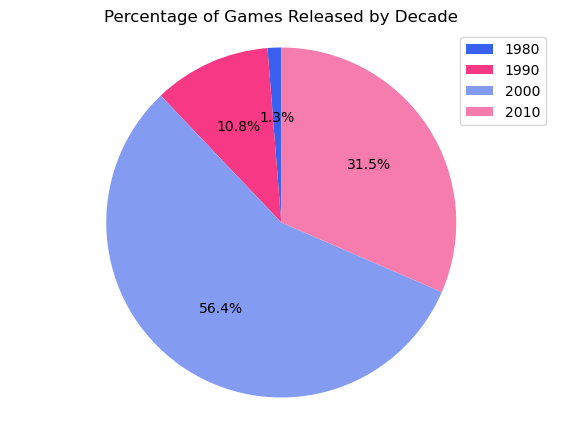

In [47]:
fig = plt.figure(figsize=(7,5))
plt.pie(decade_pct['Percentage'],
        autopct='%1.1f%%',
        startangle=90,
        colors=colors)
plt.title('Percentage of Games Released by Decade')
plt.legend(decade_pct['Decade'].astype(int))
plt.axis('equal')
plt.show()

In [48]:
fig.savefig('DecadePCTGames.png')